<img style="max-width:20em; height:auto;" src="../graphics/A-Little-Book-on-Adversarial-AI-Cover.png"/>

Author: Nik Alleyne   
Author Blog: https://www.securitynik.com   
Author GitHub: github.com/securitynik   

Author Other Books: [   

            "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",   
            
            "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/"   
        ]   


This notebook ***(Understanding the decision boundary.ipynb)*** is part of the series of notebooks From ***A Little Book on Adversarial AI***  A free ebook released by Nik Alleyne

### Understanding the decision boundary   

### Lab Objectives:  
- Learn what decision boundaries are  
- Understand decision boundary
- Visualize decision boundaries for a few different algorithms 
- Visualize the decision boundaries of both binary and multi-class problems  


### Step 1:  

In [1]:
# Import some libraries
import sklearn
from sklearn.datasets import  make_blobs
import numpy as np  

import matplotlib as mpl

# Let's use a Logistic Regression model
from sklearn.linear_model import LogisticRegression

# import metrics to understand the model's performance
from sklearn import metrics

# Library to plot the decision boundary
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

In [2]:
# Ensuring we are all using the same versions
print(f'Sklearn version: {sklearn.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Matplotlib version: {mpl.__version__}')

Sklearn version: 1.7.0
Numpy version: 2.1.3
Matplotlib version: 3.10.3


We will use *make_blobs* just as a toy dataset. Remember the objectives here is just to understand the decision boundary. We are not concerned about model development. Understanding the decision boundary is important because ultimately, this is what the threat actor needs to influence.  

This dataset just has two features and two classes. Hence this is a binary classification problem with what we hope is a simple decision boundary.   

For the binary classification, let's assume **0:benign** and **1:suspicious**. The algorithm has to separate these two classes.  

In [3]:
# Let's import some sample data
X, y = make_blobs(centers=2, random_state=10, shuffle=True)

# Take a peak at the portion of the data
X[:5], y[:5]

(array([[ 3.67982584,  4.68165164],
        [ 2.94713748,  4.46116773],
        [ 4.32968132,  5.64396726],
        [ 6.73488595, -9.38994773],
        [ 2.44301805,  3.84652646]]),
 array([1, 1, 1, 0, 1]))

Let's build a simple model to understand the concept of a decision boundary   


### Step 2:  

In [4]:
# Fit/train the model on the features (X) and labels (y)
lr_clf = LogisticRegression(random_state=10).fit(X=X, y=y)
lr_clf

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,10
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [5]:
# Get the model accuracy
# We are looking at the accuracy of the training data, just to understand how well the model might have learnt
# 1 below suggest the algorithm was able clearly separate the data  
# Meaning this dataset is perfect separable 
metrics.accuracy_score(y_true=y, y_pred=lr_clf.predict(X))

1.0

Visualize various the decision boundary   


### Step 3: 

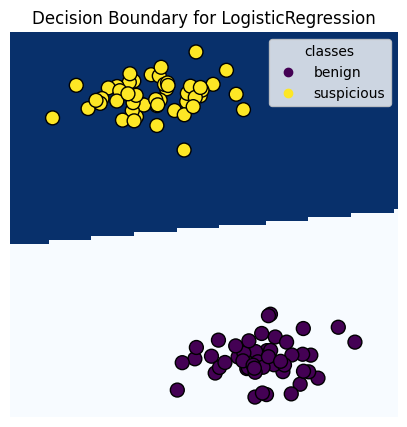

In [6]:
# Plot the decision boundary
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
disp = DecisionBoundaryDisplay.from_estimator(
    estimator=lr_clf, 
    X=X, 
    plot_method='pcolormesh', 
    response_method='predict', 
    xlabel='feature 1', 
    ylabel='feature 2', 
    ax=ax,
    cmap='Blues')

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', alpha=1.)
handles, labels = scatter.legend_elements()
disp.ax_.set_title(label=f'Decision Boundary for {lr_clf.__class__.__name__}')
plt.legend(handles=handles, labels=['benign', 'suspicious'], title='classes')
plt.axis('off')
plt.show()

Above shows that the data is clearly linearly separable. Classifying the yellow **0:benign** and brown as **1:suspicious** 

Let's try a Random Forest Classifier, to get a different perspective

### Step 4.  

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
# Using a different classifier on the same dataset
rf_clf = RandomForestClassifier(random_state=10).fit(X=X, y=y)
rf_clf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


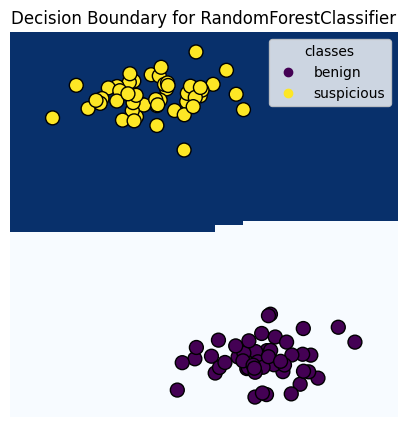

In [9]:
# Visualize the Random Forest classifier
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
disp = DecisionBoundaryDisplay.from_estimator(
    estimator=rf_clf, 
    X=X, 
    plot_method='pcolormesh', 
    response_method='predict', 
    xlabel='feature 1', 
    ylabel='feature 2', 
    ax=ax,
    cmap='Blues')

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', alpha=1.)
handles, labels = scatter.legend_elements()
disp.ax_.set_title(label=f'Decision Boundary for {rf_clf.__class__.__name__}')
plt.legend(handles=handles, labels=['benign', 'suspicious'], title='classes')
plt.axis('off');

Let us try Support Vector Classifier (SVC) this time around 

### Step 5: 

In [10]:
# Wrap this up with support vectors classifier
from sklearn.svm import SVC

In [11]:
# Default a the Radial Basis Function (RBF) Kernel is used
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
svc_clf = SVC(kernel='rbf').fit(X=X, y=y)
svc_clf

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


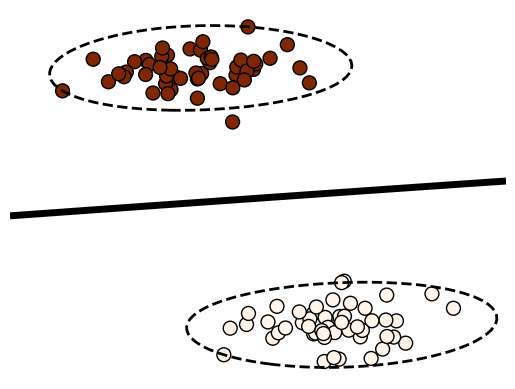

In [12]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Oranges', s=100, edgecolors='k', alpha=1.)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    estimator=svc_clf, 
    X=X, ax=ax, 
    plot_method='contour', 
    colors='k', 
    levels = [-1, 0, 1],
    linestyles=['--', '-', '--'],
    linewidths=[2,5,2]
    )

plt.axis('off');

In [13]:
# The points on the line is called the support vectors
# These can be found via
svc_clf.support_vectors_

array([[  3.44868458, -11.32833331],
       [  5.74116664,  -7.11730996],
       [  5.69248303,  -7.19999368],
       [  0.37786137,   3.78014834],
       [  3.90917002,   7.44140273],
       [  3.61546511,   1.99648088]])

In [14]:
# Get the number of support vectors for each class
svc_clf.n_support_

array([3, 3], dtype=int32)

In [15]:
# We can also get the indices of the support vectors
svc_clf.support_

array([ 9, 11, 53, 43, 44, 67], dtype=int32)

Let us do one more. In many instances, the problems we will attack will not only be binary classification but also multiclassification. What does the decision boundary look like for a three class problem for example?   

Let us start with a dataset that can help us answer that question.  

For the multiclass problem, let's assume **0:benign**, **1:suspicious** and **2:unknown**. The algorithm has to separate these three classes.  


### Step 6:  


In [16]:
# Let's import some sample data
# We are reusing all the same processes as above, except now notice that below we have classes
# 0, 1, 2. Hence three classes rather than two as above.
X, y = make_blobs(centers=3, random_state=10, shuffle=True)
X[:5], y[:5]

(array([[-2.32496308, -6.6999964 ],
        [ 0.51856831, -4.90086804],
        [ 2.44301805,  3.84652646],
        [ 5.82662285, -9.92259335],
        [ 2.03300209,  5.28990817]]),
 array([2, 2, 1, 0, 1]))

In [17]:
# Fit/train the model on the features (X) and labels (y)
lr_clf = LogisticRegression(random_state=10).fit(X=X, y=y)
lr_clf

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,10
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
# Get the model accuracy
# We are looking at the accuracy of the training data, just to understand how well the model might have learnt
# 1 below suggest the algorithm was able clearly separate the data  
metrics.accuracy_score(y_true=y, y_pred=lr_clf.predict(X))

1.0

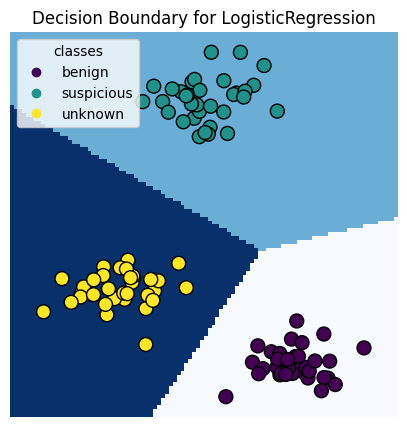

In [19]:
# Plot the decision boundary
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
disp = DecisionBoundaryDisplay.from_estimator(
    estimator=lr_clf, 
    X=X, 
    plot_method='pcolormesh', 
    response_method='predict', 
    xlabel='feature 1', 
    ylabel='feature 2', 
    ax=ax,
    cmap='Blues')

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', alpha=1.)
handles, labels = scatter.legend_elements()
disp.ax_.set_title(label=f'Decision Boundary for {lr_clf.__class__.__name__}')
plt.legend(handles=handles, labels=['benign', 'suspicious', 'unknown'], title='classes')
plt.axis('off')
plt.show()


In [20]:
# Using a different classifier on the same dataset with a multiclass problem
rf_clf = RandomForestClassifier(random_state=10).fit(X=X, y=y)
rf_clf


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


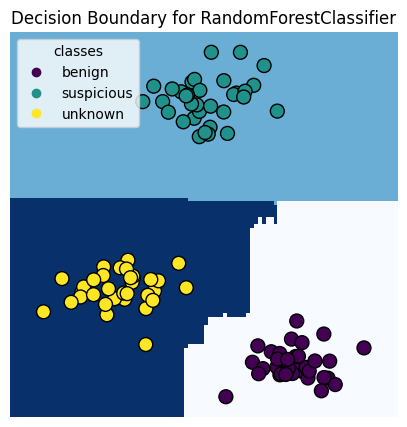

In [21]:
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
disp = DecisionBoundaryDisplay.from_estimator(
    estimator=rf_clf, 
    X=X, 
    plot_method='pcolormesh', 
    response_method='predict', 
    xlabel='feature 1', 
    ylabel='feature 2', 
    ax=ax,
    cmap='Blues')

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', alpha=1.)
handles, labels = scatter.legend_elements()
disp.ax_.set_title(label=f'Decision Boundary for {rf_clf.__class__.__name__}')
plt.legend(handles=handles, labels=['benign', 'suspicious', 'unknown'], title='classes')
plt.axis('off');


In [22]:
# Default a the Radial Basis Function (RBF) Kernel is used
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
svc_clf = SVC(kernel='rbf', random_state=10).fit(X=X, y=y)
svc_clf

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


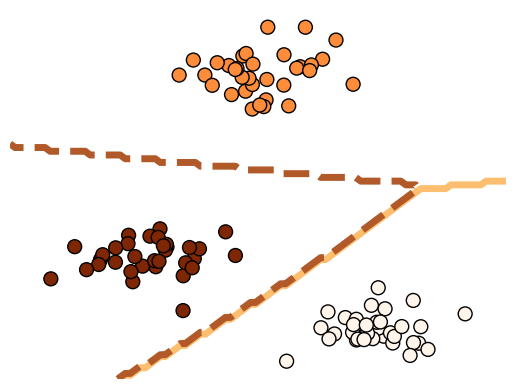

In [23]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Oranges', s=100, edgecolors='k', alpha=1.)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    estimator=svc_clf, 
    X=X, ax=ax, 
    response_method='predict',
    plot_method='contour', 
    cmap=plt.cm.Paired,
    levels = [-1, 0, 1],
    linestyles=['--', '-', '--'],
    linewidths=[5,5,5]
    )

plt.axis('off');

- At this point, we have looked at decision boundaries from the perspective of datasets with two features but for both binary and multiclass problems. If we had a situation where we had more than two features, the concept would be exactly the same. We are looking for some way to be able to separate the data into classes/groups/buckets, etc. and the decision boundary is what creates that partition.

Keep in mind also, if we had more than three features, we would not be able to properly visualize them.

### Lab Takeaways:  
- We were able to visualize the decision boundary of both binary and multiclass classification problems. 
- We should have a solid understanding of what the decision boundary is 